NetworkX Package Tutorial
-------------------------

This notebook demonstrates some basic functions of "NetworkX," a Python package that produces graphical network representations of data structures. Since NetworkX uses dictionaries to build graphical images, it's ideal for working with JSON files. We will start with a few simple examples that show the fundamentals of how a few key functions of the package work, before moving on to an example using real-world data. For the full documentation of the package (i.e., all the functions and how they work), see https://networkx.org/.

The first thing we'll do is import the NetworkX package, naming it "nx" so that we can easily use it as a prefix when writing functions.

In [1]:
import networkx as nx

Next we'll define the edges of a very simple three-node graph, using a dictionary. In NetworkX, edges are represented using a dictionary of dictionaries. For each node, we write the name of that node, a colon, and then a dictionary containing all the nodes that it is adjacent to. So if Node1 is adjacent to Node2 and Node3, we write Node 1: {Node2, Node3}, and include that in the larger dictionary that defines the entire graph. Nodes can be integers or strings. In what follows, we'll define a very simple graph in a dictionary named 'dictionary' with the string nodes 'a', 'b' and 'c', in which each node is adjacent to each other.

In [2]:
dictionary = {'a': {'b', 'c'},
                'b': {'c'}} #Note that because we assume the graph is undirected,#we only have to define each 
                            #adjacent pair once. 

The next step is to turn this dictionary into a graph. We do this using the function 'Graph', which takes as an input a dictionary and returns a graph. We'll name our graph 'G'.

In [3]:
G = nx.Graph(dictionary)

We'll then use the function 'draw_networkx' to produce a visual representation of this graph. In its simplest usage, this function takes a graph as input and returns a visual representation of it.

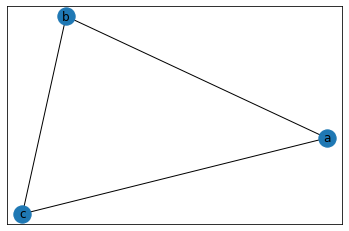

In [4]:
nx.draw_networkx(G)

Next, we'll color the edges of our graph. In general, if one has an edge Node 1: {Node2} in a dictionary, one can add attributes to that edge by specifying them as follows: Node 1: {Node2: {'attribute':'x'}}, where 'x' is any string or integer. We'll call 'x' the "value" of that attribute. Below, we define an attribute 'color', and assign the edge from 'a' to 'b' the color 'blue', assign the edge from 'a' to 'c' the color red, and assign the edge from 'b' to 'c' the color green. This yields a new dictionary, which we'll again call 'dictionary', writing over the previous dictionary. We'll also build a graph from this dictionary, which we'll again call 'G', again writing over the previous graph.

In [5]:
dictionary = {'a': {'b': {'color':'blue'}, 'c':{'color':'red'}},
    'b': {'c': {'color':'green'}}} 
G = nx.Graph(dictionary)

Next, we'll get Python to print us out a list of these colors, using the function 'get_edge_attributes'. This function takes as its input a graph and an attribute (in quotes, since it's a string) and returns a dictionary containing each edge and the value of the input attribute for that edge. We'll name that dictionary 'colors.'

In [6]:
colors = nx.get_edge_attributes(G, 'color')

Having printed this dictionary, we now want to build a list that contains just the values of the attribute 'color,' i.e., just the colors 'blue', 'red' and 'green'. To do this, we first write 'colors.values()', which produces a dictionary containing just those values of the attribute 'color'.

In [7]:
colors.values()

dict_values(['blue', 'red', 'green'])

We'll then convert that dictionary into a list:

In [8]:
list(colors.values())

['blue', 'red', 'green']

Finally, we can draw a network with the edges colored according to this list. Once again, we use the 'draw_networkx' function. In addition to inputing the graph 'G', we also specify that the color of the edges should correspond to the list of colors that we just printed.

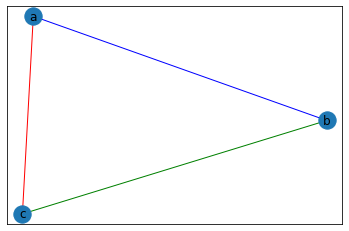

In [9]:
nx.draw_networkx(G, edge_color = list(colors.values()))

Next, we'll vary the width of each edge. We'll do this by re-writing our dictionary and adding an attribute 'width' to each edge. Instead of strings, the values of each attribute will be integers, which will each represent the relative width that we want for that edge. We'll then built an graph out of that dictionary, again called 'G', writing over our previous graph.

In [10]:
dictionary = {'a': {'b': {'color':'blue','width':1}, 'c':{'color':'red','width':5}},
    'b': {'c': {'color':'green','width':10}}}
G = nx.Graph(dictionary)

Next, we'll do exactly what we did to generate a dictionary of colors, but with the widths of each edge. 

In [11]:
widths = nx.get_edge_attributes(G, 'width')

Finally, we'll again use 'draw_networkx' to draw our network, but we'll now specify both the widths and the colors that we want for our edges.

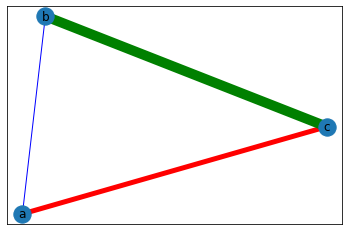

In [12]:
nx.draw_networkx(G,width=list(widths.values()),edge_color= list(colors.values()))

Up to this point, we've altered our graphs by re-writing our dictionary, and then re-building our graph out of that re-written dictionary. This is helpful in demonstrating the fundamentals of how this package works, but it's also time-consuming. Going forward, we'll instead alter our graph using additional functions from the Networkx package.

The first thing we'll do is add a node, using the 'add_node' function. This function takes a graph as a prefix, and takes a name of a node as it's argument (either a string or an integer) and adds that node to the network. We'll use this function to add a node called 'd' to our graph 'G', and then draw the graph again with that node included.

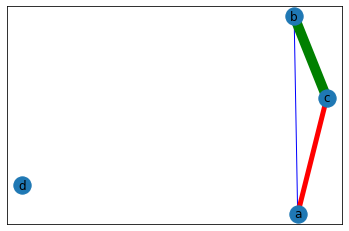

In [13]:
G.add_node('d')
nx.draw_networkx(G,width=list(widths.values()),edge_color= list(colors.values()))

Our new node is looking lonely out there. Let's connect it to the rest of the graph, using the 'add_edge' function. This function takes the graph as its prefix, and takes as it's arguments the two nodes that the new edge will connect. We can also use further arguments to specify the attributes of that edge. We'll draw a green edge, with width 5, between our new node 'd' and an existing node 'b'.

In [14]:
G.add_edge('d','b',color='green',width=5)

To draw this graph in a way that accounts for the attributes we have assigned our new edge, we'll have to re-compile our dictionary of widths and edge colors, so that they include the attributes of the new edge between 'd' and 'b'.

In [15]:
widths = nx.get_edge_attributes(G, 'width')
colors = nx.get_edge_attributes(G, 'color')

Now we can draw our graph with the new edge, using the same code that we used previously to draw the graph before we added this edge.

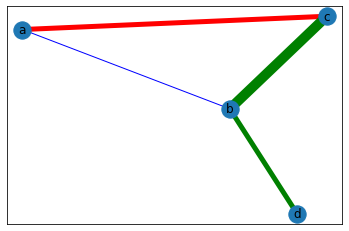

In [16]:
nx.draw_networkx(G,width=list(widths.values()),edge_color=list(colors.values()))

Let's explore some more things that NetworkX can do, like changing the colors of the nodes in our graph. To do this, we'll create a dictionary that assigns a color to each node:

In [17]:
color_dict = {'a':'blue',
              'b':'red',
              'c':'blue',
              'd':'red'}

Next, we'll use the function 'set_node_attributes' to use this dictionary to assign colors to nodes. This function takes as it's arguments a graph, a dictionary that associates the nodes of that graph with the value of some attribute, and then a string which names the attribute set by the graph. We'll use the name 'node_color' for this attribute, since we've already been using 'color' for the colors of edges.

In [18]:
nx.set_node_attributes(G,color_dict,'node_color')

Now we'll make a dictionary that contains just the node colors, using the function 'get_node_attributes'. This function works the same way as 'get_edge_attributes,' but for edges instead of nodes. We'll call the dictionary that we create 'node_colors'.

In [19]:
node_colors = nx.get_node_attributes(G, 'node_color')

At last, we can draw the graph with the nodes colored. We'll use the same function 'draw_networkx' as before, but feed it an additional argument specifying the node colors.

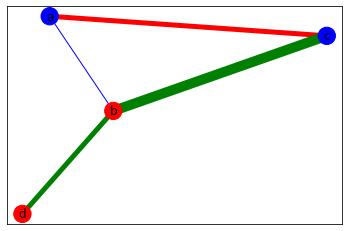

In [20]:
nx.draw_networkx(G,width=list(widths.values()),edge_color=list(colors.values()),node_color=list(node_colors.values()))

As a final demonstration of functionality, we'll show how to drop the node lables from the drawing of our graph.

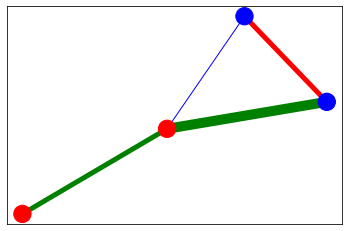

In [21]:
nx.draw_networkx(G,width=list(widths.values()),edge_color=list(colors.values()),\
                 node_color=list(node_colors.values()), with_labels=False)

Now that we've gotten a feel for the fundamentals of drawing networks with the package, we'll now turn to building a network from a meaningful data set. Specifically, we'll use a JSON file of the HANSARD database, which contains every speech made in the parliament of the United Kingdom from 1979-2020. We'll build a network that shows when MPs from one constituency mention another constituency in their speeches. This network will be a *directed graph*, meaning that edges will point from one node to another. Nodes will represent constituencies, and a node pointing from one edge to another will represent that the MP from the tail node constituency has mentioned the head node constituency in a speech. We'll do this for a single year, 2002. 

The HANSARD data is taken from https://evanodell.com/projects/datasets/hansard-data/, and coverted from CSV to JSON.  That website also lists the names of all the variables for every speech that we can use to build our graph. 

The first thing we'll do is make an empty directed graph.

In [22]:
G = nx.DiGraph() 
#The 'DiGraph' function creates a directed graph for any dictionary. 
#If you leave the argument empty, it just creates an empty graph (i.e., a graph with no nodes and no edges).

Next, we'll import the python package json, so that we can work with our JSON file containing the HANSARD data. Then we'll load all the data in that file into a list of dictionaries, which we'll call 'data.' Each dictionary in the list contains a speech, with all the variables associated with that speech (e.g., the year it was given, the constituency of the MP that gave it, etc.). Since the HANSARD file is massive, this may take 30 seconds to 1 minute depending on your machine.

In [23]:
import json #Import the json package
with open('hansard-speeches-v310.json') as file: #Open the file containing the HANSARD data, and name it 'file'
    data = json.load(file) #Turn that file into a list of dictionaries, which we'll just call 'data'.

Next, we'll loop throught the list of dictionaries, building a new list of dictionaries that contains only those speeches given in 2002. This will take a few seconds, but it's the last time we'll have to wait while our computer deals with the massive data set. 

In [24]:
speeches_2002 = [] #Start with an empty list called 'speeches_2002'
for i in range(0,len(data)): #Tell python to loop through every integer between 0 and the length of the list of speeches.
    if data[i]['year'] == '2002': #Define the condition that a speech be given in the year 2002.
        speeches_2002.append(data[i]) #Tell python that if this condition is satsified, then the speech gets added to #the list.

The next thing we'll do is use another for-loop to make a list of the constituency for the MP that gave every speech in parliament in 2002. Eventually, we'll want each consituency to be a node in our graph. However, since MPs give more than one speech in a year, looping through all the speeches will give us many repeat constituencies. So we'll need make a second list containing only the unique elements of our first list.

In [25]:
constituencies_2002 = [] #Start with an empty list called 'constituencies_2002'
for i in range(0,len(speeches_2002)): #Tell python to loop through every integer between 0 and the length of the list of 
                                        #speeches given in 2002.
    constituencies_2002.append(speeches_2002[i]['constituency']) #Add every constituency name to the list.
    
unique_constituencies_2002 = list(set(constituencies_2002)) #Make a new list with just the unique elements of 
                                                            #'constituencies_2002.'

We're now in a position to add nodes to our graph for every constituency whose MP gave a speech in 2002.

In [26]:
for i in range(0,len(unique_constituencies_2002)): #Tell python to loop through every integer between zero and the 
                                                    #length of list of unique constituencies.
    G.add_node(unique_constituencies_2002[i]) #Add a node to the graph for each unique consituency.

Now we'll do a double for-loop to add an edge from one constituency to another each time the MP from that constituency mentions the other constituency in a speech.

In [27]:
for i in range(0,len(unique_constituencies_2002)): #Tell python to loop through every integer between zero and the 
                                                   #length of list of unique constituencies.
    for j in range(0,len(unique_constituencies_2002)): #Tell python to once again loop through every integer between zero 
                                                       #and the length of list of unique constituencies, for each iteration 
                                                       #of the first loop.
        if unique_constituencies_2002[i] in speeches_2002[j]['speech']\
        and unique_constituencies_2002[i]!=speeches_2002[j]['constituency']: #Define the condition that the consituency 
                                                                            #indexed in the first loop is mentioned in a speech given by the MP whose constituency is indexed in the second loop, avoiding self-reference.
            G.add_edge(unique_constituencies_2002[i],speeches_2002[j]['constituency']) #If the condition above is satisifed, 
                                                    #add an edge from the first constituency to the second in the graph.

Once that's done, we'll draw the graph with the directed edges. We'll turn off node lables, since that's too much text to fit into a legible graph.

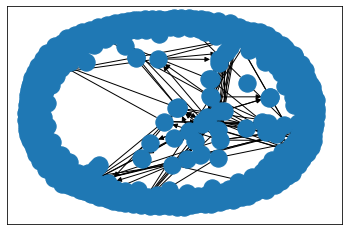

In [28]:
nx.draw_networkx(G,with_labels=False)

Clearly, this graph is too small. To make it bigger, we'll import matplotlib.pyplot, and use it to set the size of the figure to something larger.

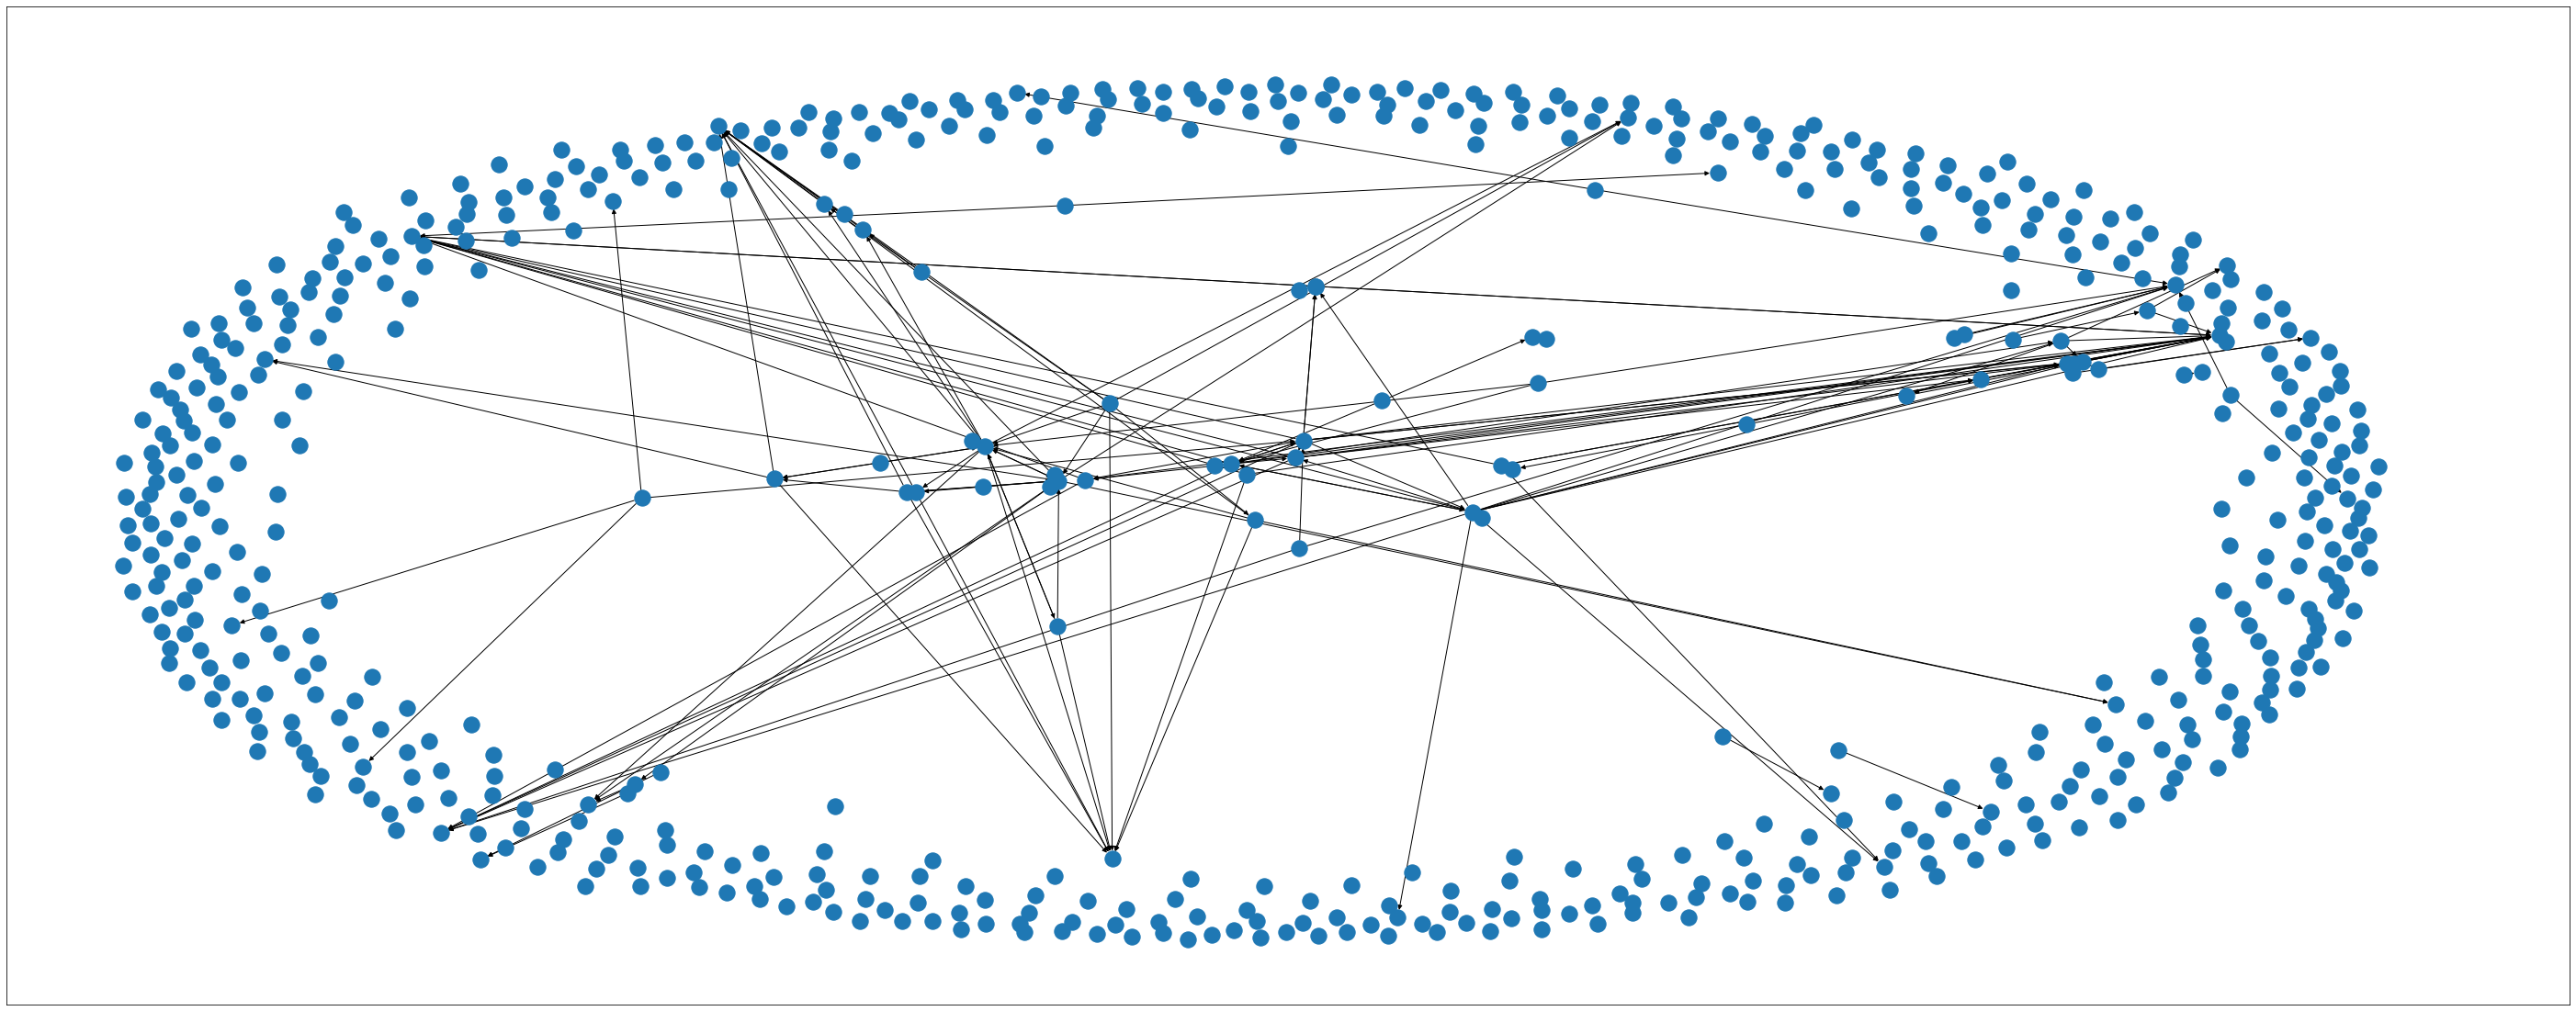

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50, 20))
nx.draw_networkx(G,with_labels=False)

That's better, but on its own, this graph still doesn't tell us much. However, it puts us in a good position to ask some research questions. For instance, looking at this, I'm curious about whether MPs are more likely to mention the constituencies of members of their own party, or the members of opposing parties. One quick way to investigate this will be to color the nodes based on the party of the MP representing that consituency. The first thing we'll want to do is generate a list of the unique parties of every MP that gave a speech in 2002.

In [30]:
parties_2002 = [] #Create an empty list called 'parties_2002'.
for i in range(0,len(speeches_2002)): #Tell python to loop through the integers between 0 and the length of the list of 
                                    #speeches given in 2002.
    parties_2002.append(speeches_2002[i]['party']) #Add the party of the MP that gave each speech.
    
unique_parties_2002 = list(set(parties_2002)) #Re-write the list so that it contains only its unique elements.
unique_parties_2002 #Print the list of unique elements.

['Ulster Unionist Party',
 'NA',
 'Labour',
 'Plaid Cymru',
 'Conservative',
 'Labour (Co-op)',
 'Liberal Democrat',
 'Speaker',
 'Independent Conservative',
 'Democratic Unionist Party',
 'Social Democratic & Labour Party',
 'Scottish National Party',
 'Independent']

Now that we know all the unique parties, we can define a function that takes as its input each party, and outputs a color appropriate that party. To simplify things a bit, we'll group independent conservatives with all conservatives under the blue color, group all the different Labour parties under the red color, and group all the Northern Irish unionist parties under the cyan color. 

In [31]:
def party_to_color(x):
    if x == 'Conservative' or x == 'Independent Conservative':
        return 'blue'
    if x == 'Labour' or x == 'Labour (Co-op)' or x == 'Social Democratic & Labour Party':
        return 'red'
    if x == 'Speaker':
        return 'black'
    if x == 'Democratic Unionist Party' or x == 'Ulster Unionist Party':
        return 'cyan'
    if x == 'Scottish National Party':
        return 'yellow'
    if x == 'Liberal Democrat':
        return 'orange'
    if x == 'Plaid Cymru':
        return 'magenta'
    if x == 'NA' or x == 'Independent':
        return 'green'

Next, we'll build a dictionary containing each constituency and the color of the party associated with that consitutency. **N.B., 2002 is an easy year to do this because no seats changed from one party to another. In an election year or another year where seats changed hands, one would have to figure out how to account for this when building a network.**

In [32]:
constituency_color_dict = {} #Create the an empty dictionary called 'constituency_color_dict'.
for i in range(0,len(speeches_2002)): #Tell python to loop through the integers between 0 and the length of the list of 
                                        #speeches given in 2002.
    constituency_color_dict[speeches_2002[i]['constituency']]=party_to_color(speeches_2002[i]['party']) #Create a 
                #dictionary entry for each constituency, and add use the function defined above to add the color 
                #associated with the party of the MP whi gave that speech. 
    
nx.set_node_attributes(G,constituency_color_dict,'node_color') #Define the node attribute 'node_color', and set it using 
                                                               #the dictionary defined above.
node_colors = nx.get_node_attributes(G, 'node_color') #Obtain the list of node colors. 

Now we'll draw the graph, with the nodes colored by party.

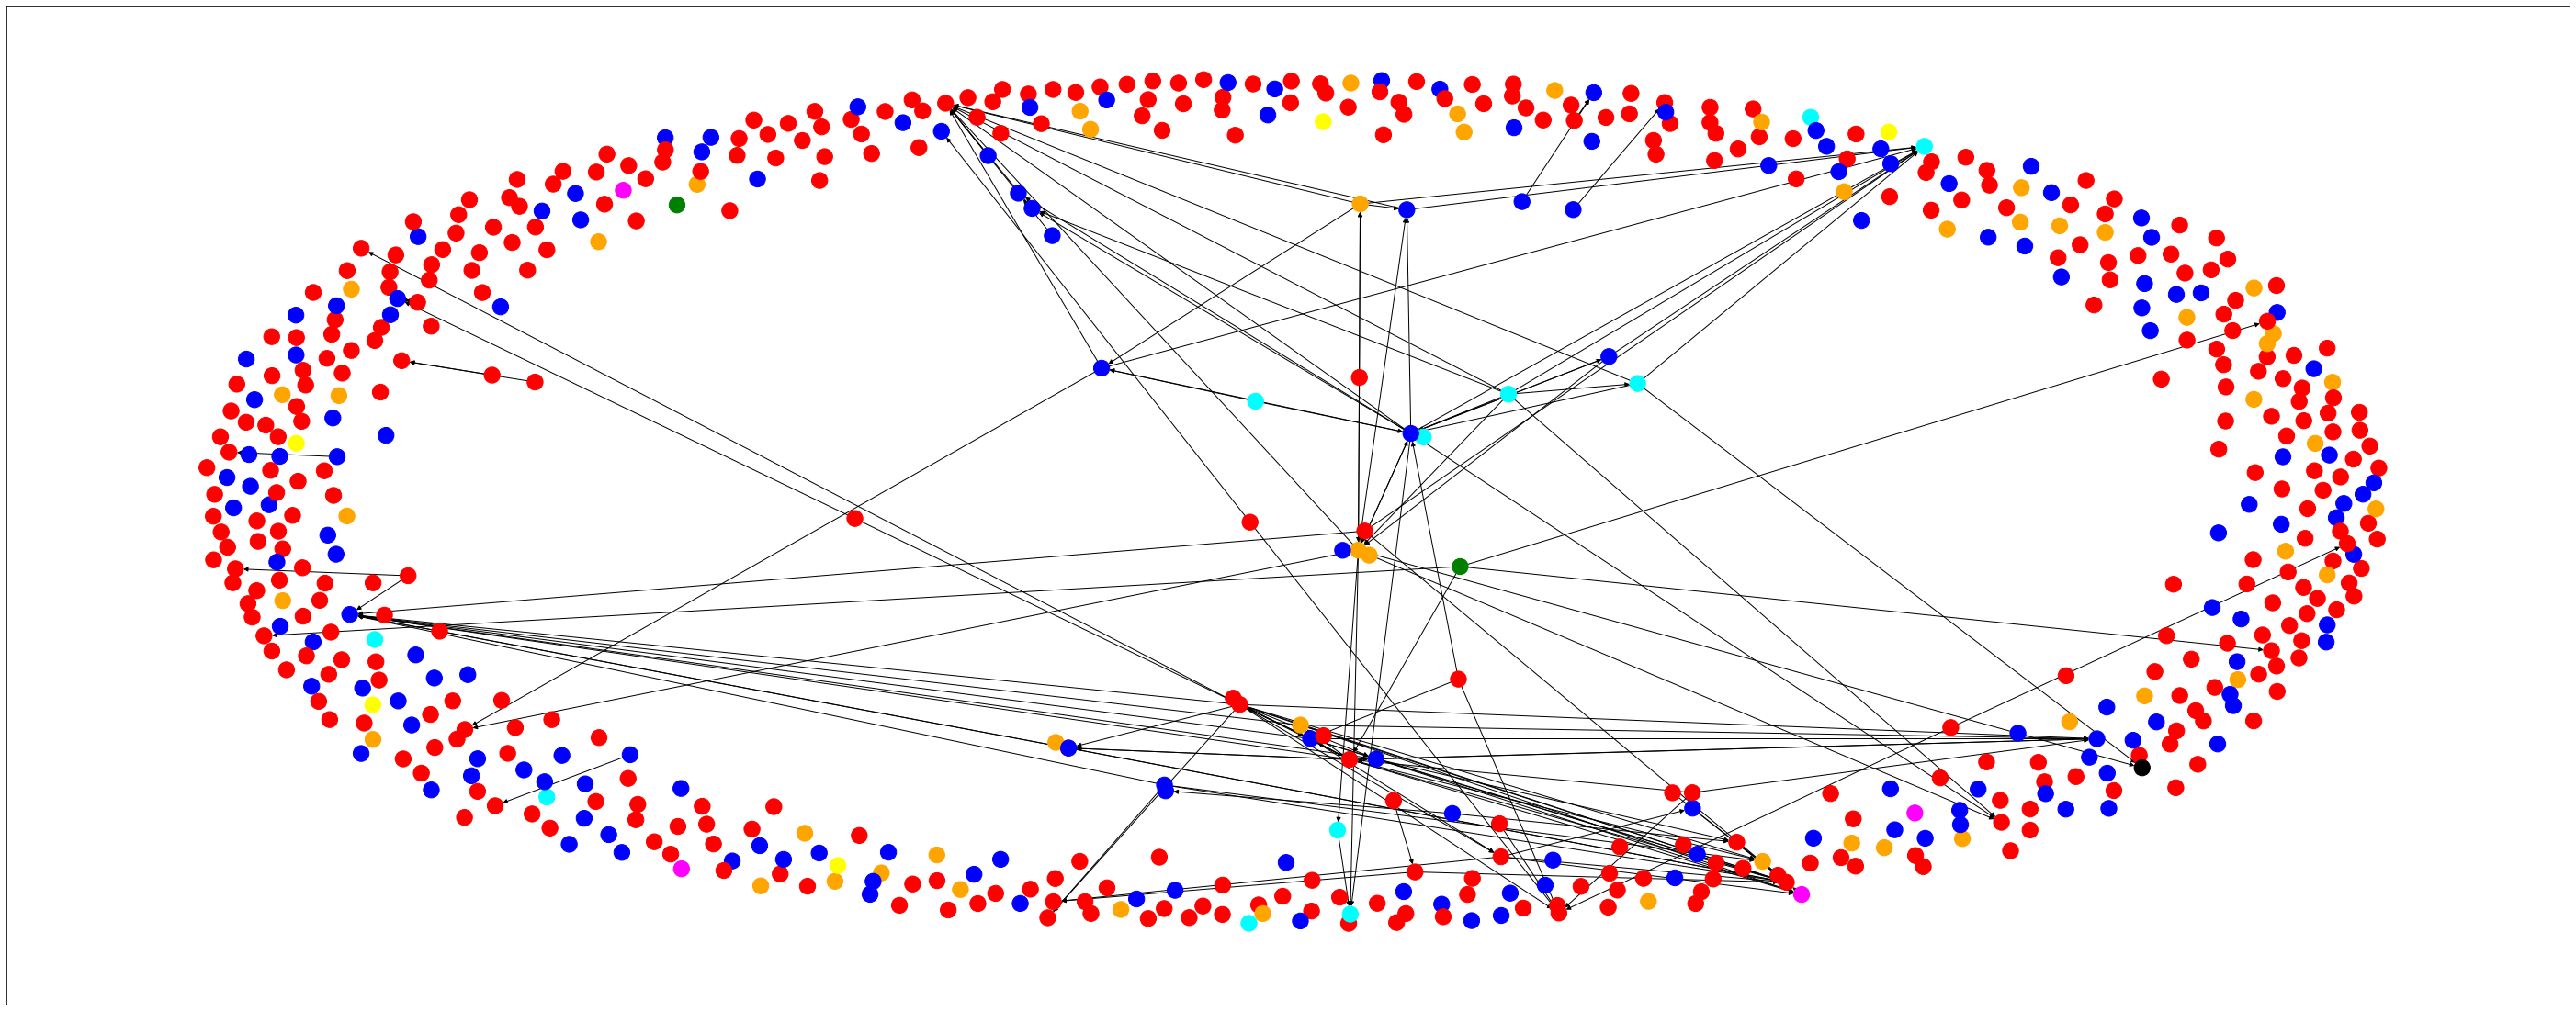

In [33]:
fig = plt.figure(figsize=(50, 20))
nx.draw_networkx(G,node_color=list(node_colors.values()),with_labels=False)

This is a little better, but still not great, in terms of extracting something meaningful. The first thing we can do is get rid of any constituencies that are not connected to any others in either direction, so that we're only looking at the nodes of interest to our analysis. We'll do this by looping through the list of constituencies, making a list of all those that are not part of any edges, and then removing the nodes corresponding to those constituencies from the graph.

In [34]:
unconnected_contituencies = [] #Create an empty list called 'unconnected_contituencies'
for i in range(0,len(unique_constituencies_2002)): #Tell python to loop through the integers between 0 and the length of 
                                                   #the list of unique consituencies in 2002.
    count = 0 #For each integer in the loop above, set the count to zero.
    for j in range(0,len(unique_constituencies_2002)): #Once again tell python to loop through the integers between 
                                                       #0 and the length of the list of unique consituencies in 2002.
        if (unique_constituencies_2002[i],unique_constituencies_2002[j]) in G.edges \
        or (unique_constituencies_2002[j],unique_constituencies_2002[i]) in G.edges: #Set the condition that there is 
            #an edge in either direction between the node indexed in the first loop and the node indexed in the second loop.
            count = count + 1 #If the condition is satisfied, add 1 to the counter
    if count == 0: #Moving out of the second loop, set the condition that the counter equal zero. 
        #If this condition holds, this means there are no edges between the node associated with the constituency 
        #indexed by the first loop and any of the other nodes in the graph.
        unconnected_contituencies.append(unique_constituencies_2002[i]) #If the condition above is satisfied, add the
        #consitinuency indexed in the first loop to the list.
        
for i in range(0,len(unconnected_contituencies)):#Having generated the list of unconnected constituencies, tell Python to 
    #loop through it, and remove the node corresponding to each unconnected constituency from the graph.
    G.remove_node(unconnected_contituencies[i])

Next, we'll remove the entries for all the uncorrected graph from our dictionary of constituency colors, and re-compile a dictionary of just the remaining node colors.

In [35]:
for i in range(0,len(unconnected_contituencies)): #Tell python to loop through the list of integers between zero and the 
    #length of the list of unconnected constituencies
    del constituency_color_dict[unconnected_contituencies[i]] #Delete the entry corresponding to each unconnected constituency 
                                                #from the consitituency_color_dict.
    
nx.set_node_attributes(G,constituency_color_dict,'node_color') #Define the node attribute 'node_color', and set it using 
                                                                #the dictionary defined above.
node_colors = nx.get_node_attributes(G, 'node_color') #Obtain the list of node colors. 

Now we can draw the graph again with only the connected nodes.

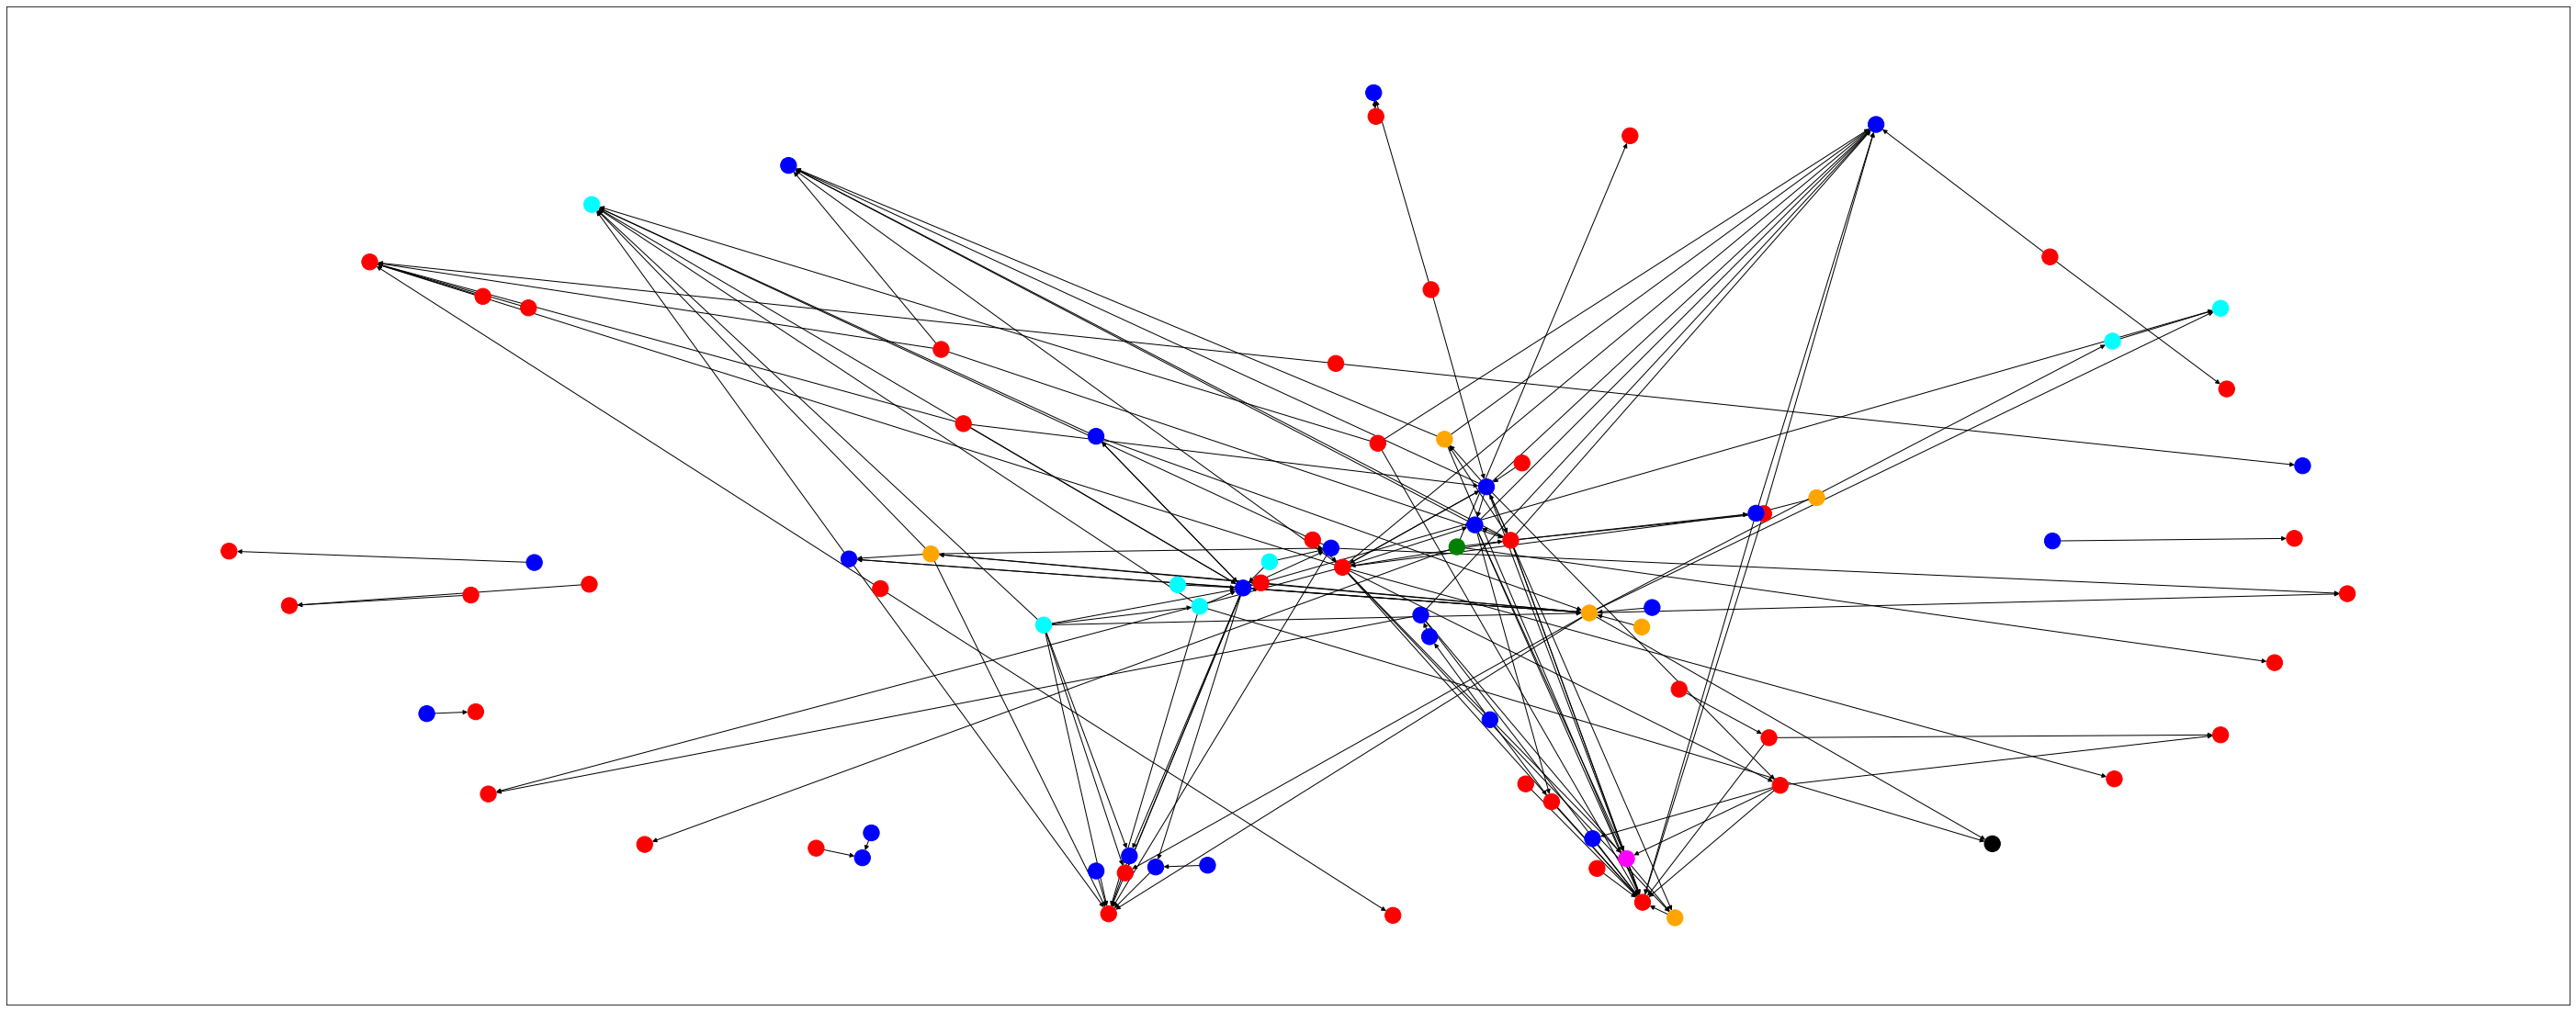

In [36]:
fig = plt.figure(figsize=(50, 20))
nx.draw_networkx(G,node_color=list(node_colors.values()),with_labels=False)

We're getting somewhere, but we can still do better. What would be really good is if we could cluster the colors so that they are all segregated, and then see whether there is more cross-party or intra-party mentioning of other MPs' consituencies. Thankfully, draw_networkx can take as an optional argument a dictionary of positions to each node. Recalling that our plot of the graph is a grid with a horizontal axis from 0 to 50 and a vertical axis from 0 to 20, we can define a function that randomly places nodes in different parts of the graph based on their color.

In [37]:
import random #Import to the package random to allow us to randomly sample from a range of numbers.
def color_to_position(x):
    if x == 'blue':
        return (random.uniform(40,49),random.uniform(15,19)) #Place any of the blue parties (Conservatives and variants 
                                            #thereon) in a random location in the top-right of the plot.
    if x == 'red':
        return (random.uniform(1,10),random.uniform(15,19)) #Place any of the red parties (Labour and variants thereon) 
                                                            #in a random location in the top-left of the plot.
    if x == 'black':
        return (25,10) #Place the black node (the speaker) near the center of the plot.
    if x == 'cyan':
        return (random.uniform(40,49),random.uniform(5,9)) #Place any of the cyan parties in a random location in the 
                                                            #bottom-right of the plot.
    if x == 'yellow':
        return (random.uniform(1,10),random.uniform(5,9)) #Place the yellow party (Scottish Nationalists) in the bottom 
                                                            #left.
    if x == 'orange':
        return (random.uniform(11,20),random.uniform(5,9)) #Place the orange party (Lib Dems) in the bottom center-left.
    if x == 'magenta':
        return (random.uniform(11,20),random.uniform(15,19)) #Place the magenta party (Welsh Nationalists) in the top 
                                                            #center-left.
    if x == 'green':
        return (random.uniform(21,30),random.uniform(15,19)) #Place the green nodes (NA, Independent) in the top center-right. 

Equipped with this function, we can build a dictionary that assigns each node in the graph a position.

In [38]:
node_positions = {} #Create an empty dictionary called 'node_positions'.
for i in range(0,len(list(G.nodes))): #Tell python to loop through the integers between zero and the length of the list 
                                     #of nodes in the graph.
    node_positions[list(G.nodes)[i]] = color_to_position(constituency_color_dict[list(G.nodes)[i]]) #For each node in the 
                    #graph, add an entry to the dictionary assigning a position to that node, based on its color, 
                    #using the function defined above.

And now we can draw our new graph, using this dictionary to specify the position of each node.

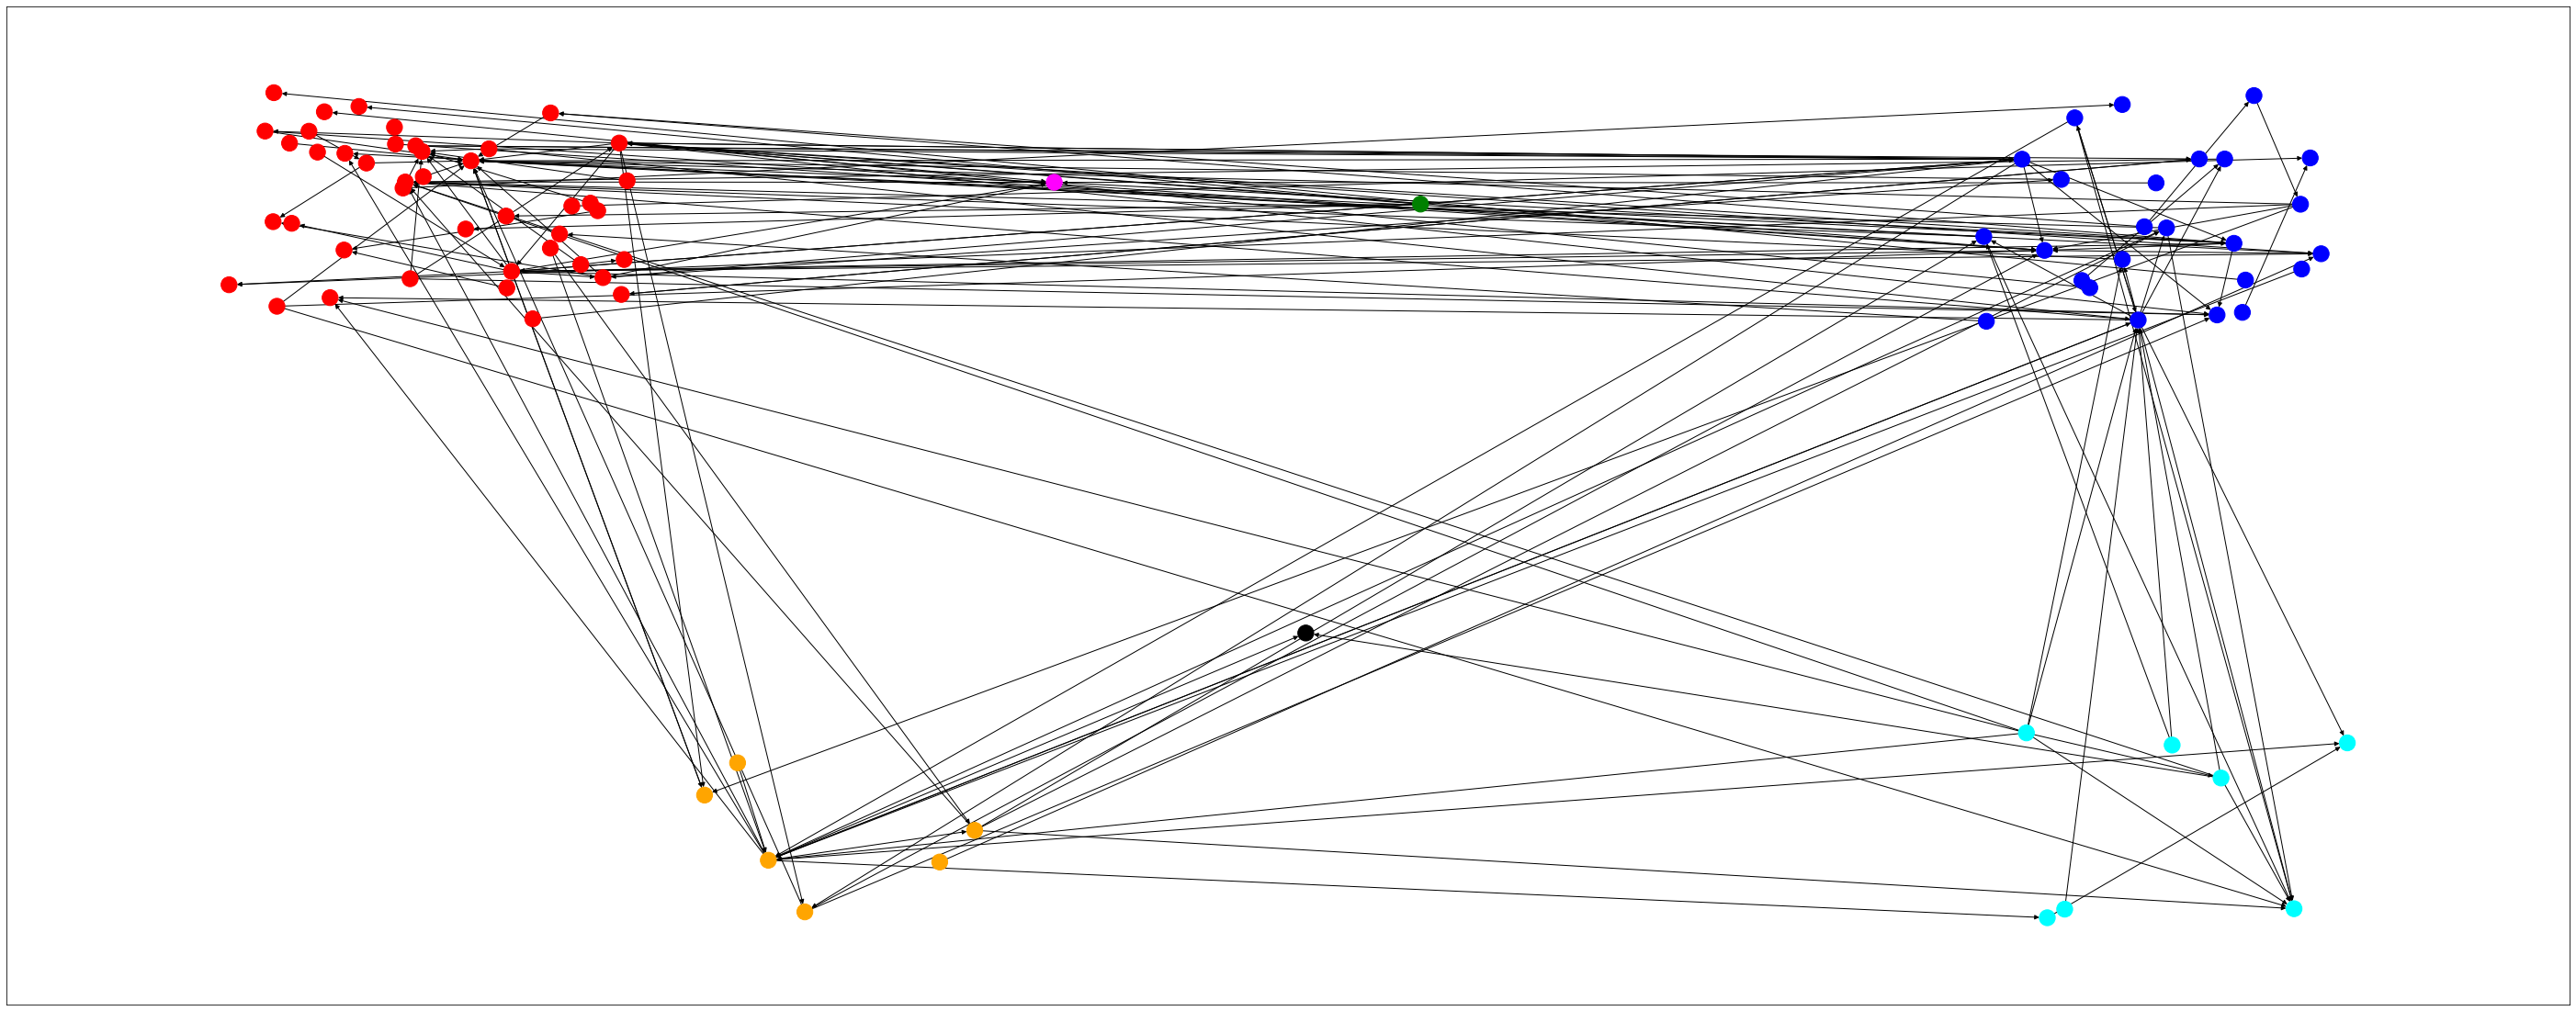

In [39]:
fig = plt.figure(figsize=(50, 20))
nx.draw_networkx(G,pos = node_positions,node_color=list(node_colors.values()),with_labels=False)

At last, we've got something interpretable. Looking at this network, one sees that while MPs from all parties talk a bit about the constituencies of MPs in their own party, on the whole there is more cross-party talking about each other's constituencies (and by extension, each other). Indeed, at the top of the network, one sees a dense thicket of edges indicating Labour MPs mentioning the constituencies of Tory MPs and Tory MPs mentioning the constituencies of Labour MPs. All of this could be more finely quantified, but in computational analytics, as anywhere, sometimes a picture is most evocative.